In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn import cluster, mixture
from sklearn import metrics
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("data/snsdata.csv")
df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1, inplace=True)
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
ss_scaler = preprocessing.StandardScaler()
X_scaled = ss_scaler.fit_transform(df)

In [4]:
k_means = cluster.KMeans(n_clusters=9,n_init=10, init="k-means++", max_iter=100, random_state=42)
clusters = k_means.fit_predict(X_scaled)
clusters

array([1, 2, 1, ..., 1, 1, 1])

In [5]:
pd.DataFrame(clusters).value_counts()

1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

<Axes: title={'center': 'Elbow'}, xlabel='Clusters', ylabel='Inertia'>

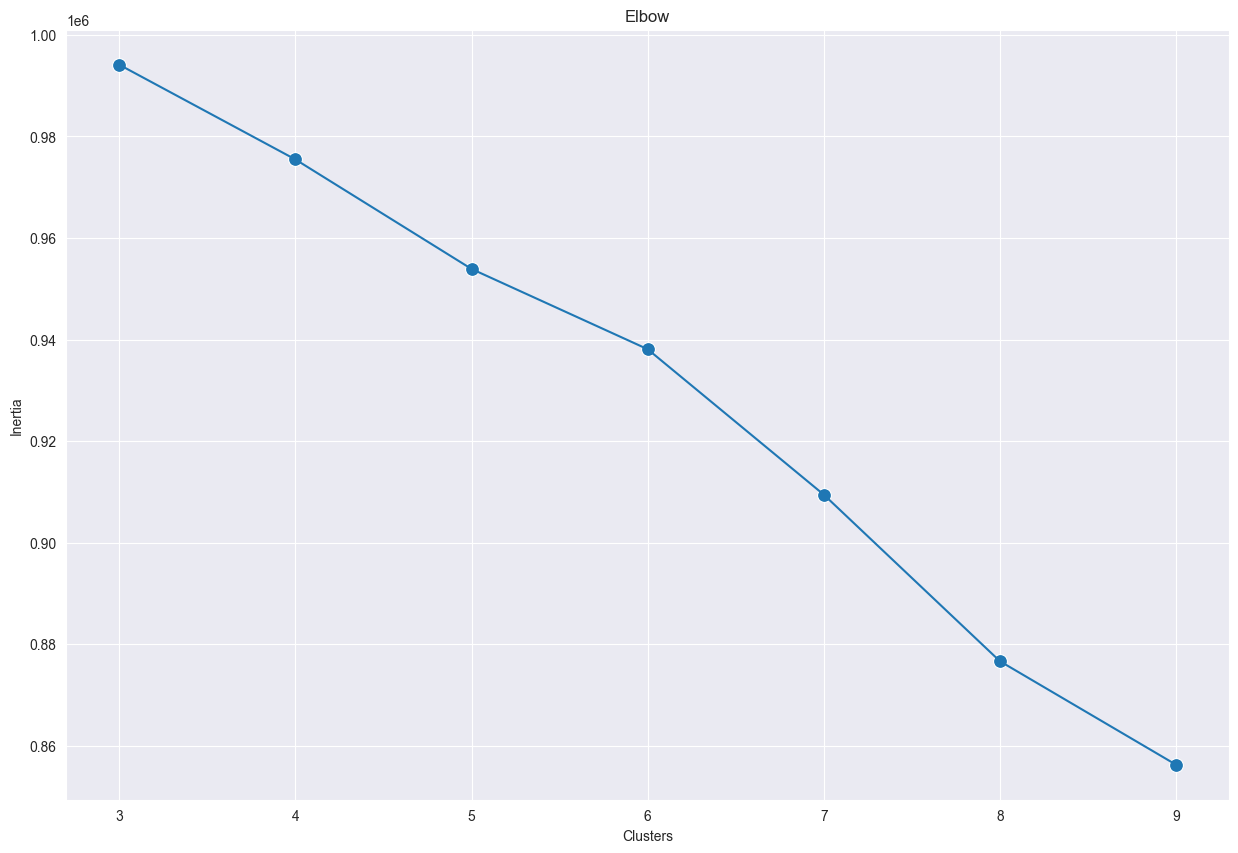

In [6]:
inertia = []
n_clusters = range(3,10)
for clusters in n_clusters:
    k_means = cluster.KMeans(clusters, n_init=1, random_state=42)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)
fig = plt.figure(figsize=(15,10))
sns.lineplot(x=n_clusters, y=inertia, markers='*').set(title='Elbow', ylabel='Inertia', xlabel='Clusters')
sns.scatterplot(x=n_clusters, y=inertia, s=100)

    

<Axes: title={'center': 'Silhouette'}, xlabel='Clusters', ylabel='coef'>

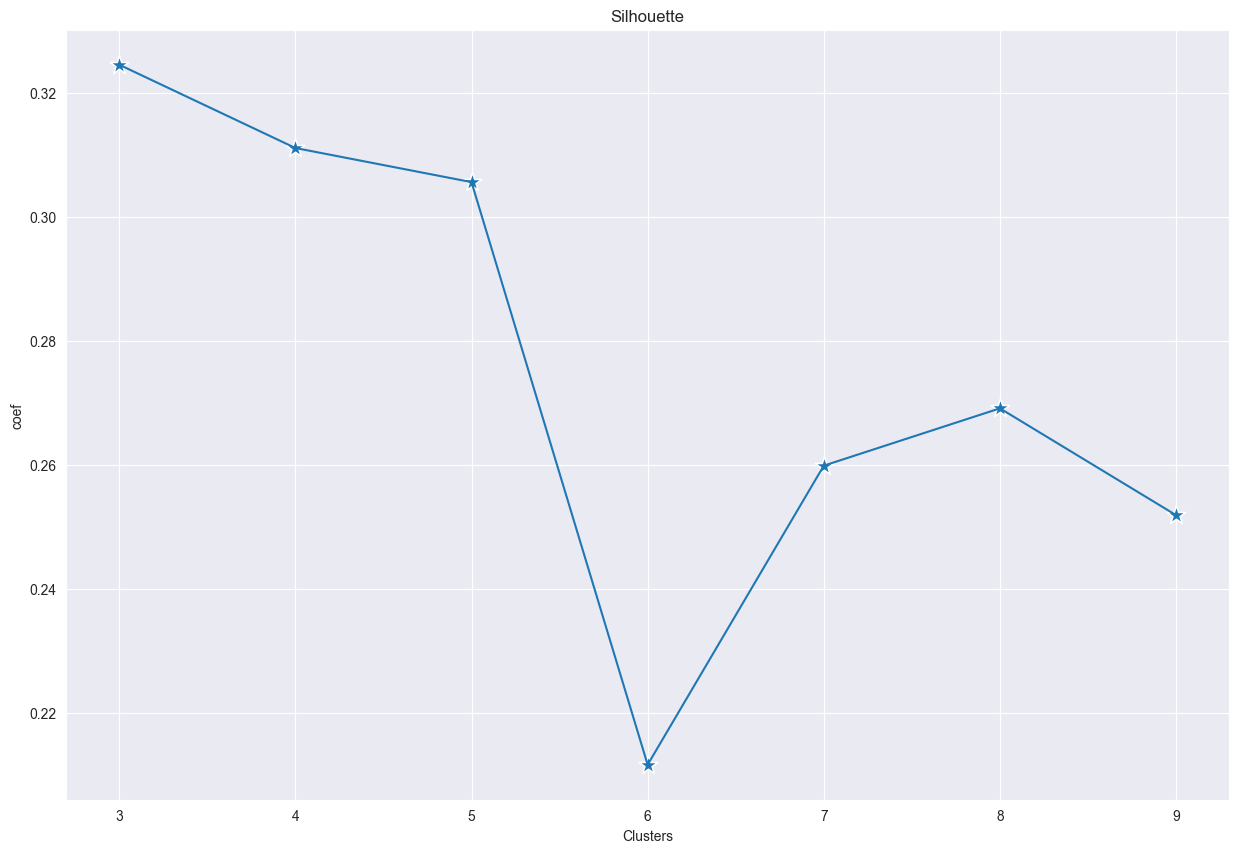

In [7]:
silh = []
n_clusters = range(3,10)
for clusters in n_clusters:
    k_means = cluster.KMeans(clusters, n_init=1, random_state=42)
    preds = k_means.fit_predict(X_scaled)
    silh.append(metrics.silhouette_score(X_scaled, preds))
fig = plt.figure(figsize=(15,10))
sns.lineplot(x=n_clusters, y=silh).set(title='Silhouette', ylabel='coef', xlabel='Clusters')
sns.scatterplot(x=n_clusters, y=silh, marker='*', s=200)

In [8]:
k_means_opt = cluster.KMeans(3, n_init=3, max_iter=1000, random_state=42)
clusters = k_means_opt.fit_predict(X_scaled)

In [9]:
k_means_opt.inertia_

994114.7202253027

In [10]:
pd.DataFrame({'target': clusters})

,target
0,0
1,1
2,0
3,0
4,2
...,...
29995,0
29996,0
29997,0
29998,0


In [11]:
X_clustered = pd.concat([df, pd.DataFrame({'target': clusters})], axis=1)
X_clustered

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
top_list = list()
for label, group in X_clustered.groupby('target'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False).nlargest(10)
    top_list.append(set(means.index))
set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [13]:
top_list

[{'band',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'rock',
  'shopping',
  'soccer'},
 {'basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'mall',
  'music',
  'shopping'},
 {'band',
  'dance',
  'die',
  'drugs',
  'god',
  'hair',
  'kissed',
  'music',
  'rock',
  'sex'}]

In [14]:
gmm = mixture.GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm_preds = gmm.fit_predict(X_scaled)
pd.value_counts(gmm_preds)

0    21776
1     6194
2     2030
Name: count, dtype: int64